# Creative Gaming: Uplift Modeling

* Team-lead GitHub userid: rsm-nahossain
* Group name: Group 9
* Team member names:
    - Nadifa Hossain
    - Kush Desai
    - Shruthi Suresh
    - Anjana Khabir

## Setup

Please complete this python notebook with your group by answering the questions in `cg-uplift-msba.pdf`. Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is the second group assignment for MGTA 455 and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:


![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm

In [2]:
import os

In [3]:
## loading the organic data - this dataset must NOT be changed
## GROUP 1
cg_organic_control = pd.read_parquet("data/cg_organic_control.parquet").reset_index(drop=True)
cg_organic_control

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
0,no,7,18,0,124,0,81,0,yes,no,8,0,0,4,no,yes,3,2101,no,no
1,no,10,3,2,60,0,18,479,no,no,10,7,0,0,yes,no,7,1644,yes,no
2,no,2,1,0,0,0,0,0,no,no,0,0,0,2,no,no,8,3197,yes,yes
3,no,2,11,1,125,0,73,217,no,no,0,0,0,0,yes,no,6,913,no,no
4,no,8,15,0,0,0,6,51,yes,no,0,0,2,1,yes,no,21,2009,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,10,2,0,14,0,105,0,no,no,0,0,0,0,no,no,11,2192,no,no
29996,no,9,7,0,163,2,83,5,no,no,0,0,0,0,yes,no,11,3743,yes,no
29997,no,10,15,0,1,1,59,9,no,no,3,0,0,0,yes,no,22,1858,yes,yes
29998,no,8,11,0,31,0,0,276,no,no,2,0,0,0,yes,no,19,1797,no,no


In [4]:
rsm.md("data/cg_organic_control_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")


In [5]:
## loading the treatment data - this dataset must NOT be changed
cg_ad_treatment = pd.read_parquet("data/cg_ad_treatment.parquet").reset_index(drop=True)
cg_ad_treatment

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k
0,no,6,16,0,0,0,0,0,yes,no,...,0,0,0,no,no,11,1827,no,no,0
1,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
2,no,6,1,0,0,0,0,0,no,no,...,0,0,0,no,yes,2,1948,yes,no,0
3,yes,7,16,0,102,1,0,194,no,no,...,0,0,0,yes,yes,21,3409,yes,yes,0
4,no,10,1,1,233,0,23,0,no,no,...,0,5,0,no,yes,4,2922,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,no,6,8,0,115,0,13,0,yes,no,...,0,0,4,no,no,11,2343,yes,no,1
149996,no,7,19,0,0,0,0,0,no,no,...,0,0,0,no,no,1,3166,yes,no,0
149997,no,1,5,0,207,0,37,10,yes,no,...,0,3,0,yes,yes,5,2619,yes,no,0
149998,no,7,19,1,0,0,88,0,no,no,...,0,1,4,no,no,9,2343,no,no,0


In [6]:
rsm.md("data/cg_ad_treatment_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")
* rnd_30k: Dummy variable that randomly selects 30K customers (1) and the remaining 90K (0)


In [7]:
# show the content of another notebook
rsm.md_notebook("./sub-notebooks/question1.ipynb")


```python
clf_oc = rsm.model.logistic(
    data={"cg_organic_control": cg_organic_control},
    rvar="converted",
    lev="yes",
    evar=["GameLevel", "NumGameDays", "NumGameDays4Plus"],
)
clf_oc.summary()
```


In [8]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

Logistic regression (GLM)
Data                 : cg_organic_control
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                     OR     OR%  coefficient  std.error  z.value p.value     
Intercept         0.018  -98.2%        -4.02      0.082  -48.956  < .001  ***
GameLevel         1.105   10.5%         0.10      0.011    9.102  < .001  ***
NumGameDays       1.032    3.2%         0.03      0.004    7.493  < .001  ***
NumGameDays4Plus  1.065    6.5%         0.06      0.006   11.159  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.036
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.651
Log-likelihood: -6315.137, AIC: 12638.275, BIC: 12671.511
Chi-squared: 465.178, df(3), p.value < 0.001 
Nr obs: 30,000


In [9]:
# load a custom python module
from utils.functions import example

example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



## Part I: Uplift Modeling Using Machine Learning

In [10]:
## Question answers

## GROUP 2

cg_ad_random = pd.read_parquet("data/cg_ad_random.parquet").reset_index(drop=True)
cg_ad_random

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
0,no,2,8,0,0,0,5,4,no,no,0,0,8,0,yes,no,3,1889,no,yes
1,no,5,15,0,179,0,50,362,yes,no,22,0,4,4,no,no,2,1308,yes,no
2,no,7,7,0,267,0,64,0,no,no,5,0,0,0,no,yes,1,3562,yes,no
3,no,4,4,0,36,0,0,0,no,no,0,0,0,0,no,no,2,2922,yes,no
4,no,8,17,0,222,10,63,20,yes,no,10,0,9,6,yes,no,4,2192,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,5,1,0,0,0,0,0,no,no,0,0,0,0,yes,yes,11,2374,no,no
29996,no,9,12,0,78,0,59,1,yes,no,16,0,0,5,yes,no,2,1978,yes,no
29997,no,9,19,1,271,0,71,95,yes,no,14,0,0,3,no,no,2,2831,yes,yes
29998,no,10,23,0,76,6,20,107,no,no,38,0,1,0,no,no,9,3197,yes,no


### Question 1.a

In [11]:
# adding column ad in cg_ad_random dataset

cg_ad_random["ad"] = 1
cg_ad_random

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad
0,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
1,no,5,15,0,179,0,50,362,yes,no,...,0,4,4,no,no,2,1308,yes,no,1
2,no,7,7,0,267,0,64,0,no,no,...,0,0,0,no,yes,1,3562,yes,no,1
3,no,4,4,0,36,0,0,0,no,no,...,0,0,0,no,no,2,2922,yes,no,1
4,no,8,17,0,222,10,63,20,yes,no,...,0,9,6,yes,no,4,2192,yes,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,5,1,0,0,0,0,0,no,no,...,0,0,0,yes,yes,11,2374,no,no,1
29996,no,9,12,0,78,0,59,1,yes,no,...,0,0,5,yes,no,2,1978,yes,no,1
29997,no,9,19,1,271,0,71,95,yes,no,...,0,0,3,no,no,2,2831,yes,yes,1
29998,no,10,23,0,76,6,20,107,no,no,...,0,1,0,no,no,9,3197,yes,no,1


### Question 1.b

In [12]:
# adding column ad in cg_organic_control dataset

cg_organic_control["ad"] = 0
cg_organic_control

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad
0,no,7,18,0,124,0,81,0,yes,no,...,0,0,4,no,yes,3,2101,no,no,0
1,no,10,3,2,60,0,18,479,no,no,...,7,0,0,yes,no,7,1644,yes,no,0
2,no,2,1,0,0,0,0,0,no,no,...,0,0,2,no,no,8,3197,yes,yes,0
3,no,2,11,1,125,0,73,217,no,no,...,0,0,0,yes,no,6,913,no,no,0
4,no,8,15,0,0,0,6,51,yes,no,...,0,2,1,yes,no,21,2009,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,10,2,0,14,0,105,0,no,no,...,0,0,0,no,no,11,2192,no,no,0
29996,no,9,7,0,163,2,83,5,no,no,...,0,0,0,yes,no,11,3743,yes,no,0
29997,no,10,15,0,1,1,59,9,no,no,...,0,0,0,yes,no,22,1858,yes,yes,0
29998,no,8,11,0,31,0,0,276,no,no,...,0,0,0,yes,no,19,1797,no,no,0


### Question 1.c

In [13]:
# stacking Group 1 & 2 datasets

cg_rct_stacked = pd.concat([cg_organic_control, cg_ad_random], ignore_index=True)
cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad
0,no,7,18,0,124,0,81,0,yes,no,...,0,0,4,no,yes,3,2101,no,no,0
1,no,10,3,2,60,0,18,479,no,no,...,7,0,0,yes,no,7,1644,yes,no,0
2,no,2,1,0,0,0,0,0,no,no,...,0,0,2,no,no,8,3197,yes,yes,0
3,no,2,11,1,125,0,73,217,no,no,...,0,0,0,yes,no,6,913,no,no,0
4,no,8,15,0,0,0,6,51,yes,no,...,0,2,1,yes,no,21,2009,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,0,0,0,yes,yes,11,2374,no,no,1
59996,no,9,12,0,78,0,59,1,yes,no,...,0,0,5,yes,no,2,1978,yes,no,1
59997,no,9,19,1,271,0,71,95,yes,no,...,0,0,3,no,no,2,2831,yes,yes,1
59998,no,10,23,0,76,6,20,107,no,no,...,0,1,0,no,no,9,3197,yes,no,1


### Question 1.d

In [14]:
# creating training variable

cg_rct_stacked["training"] = rsm.model.make_train(data=cg_rct_stacked, test_size=0.3, strat_var=["converted", "ad"], random_state = 1234)
cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad,training
0,no,7,18,0,124,0,81,0,yes,no,...,0,4,no,yes,3,2101,no,no,0,1.0
1,no,10,3,2,60,0,18,479,no,no,...,0,0,yes,no,7,1644,yes,no,0,1.0
2,no,2,1,0,0,0,0,0,no,no,...,0,2,no,no,8,3197,yes,yes,0,1.0
3,no,2,11,1,125,0,73,217,no,no,...,0,0,yes,no,6,913,no,no,0,0.0
4,no,8,15,0,0,0,6,51,yes,no,...,2,1,yes,no,21,2009,yes,no,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,0,0,yes,yes,11,2374,no,no,1,0.0
59996,no,9,12,0,78,0,59,1,yes,no,...,0,5,yes,no,2,1978,yes,no,1,1.0
59997,no,9,19,1,271,0,71,95,yes,no,...,0,3,no,no,2,2831,yes,yes,1,1.0
59998,no,10,23,0,76,6,20,107,no,no,...,1,0,no,no,9,3197,yes,no,1,0.0


### Question 1.e

In [15]:
# probability check

pd.crosstab(cg_rct_stacked.converted, [cg_rct_stacked.ad, cg_rct_stacked.training], normalize="columns").round(2)

ad            0           1      
training    0.0   1.0   0.0   1.0
converted                        
yes        0.06  0.06  0.13  0.13
no         0.94  0.94  0.87  0.87

### Question 2

In [16]:
# training an uplift model using logistic regression: calculating the uplift score

pd.crosstab(cg_rct_stacked.ad, cg_rct_stacked.training) # checking the distribution of treatment and control in train and test

training,0.0,1.0
ad,,
0,9000,21000
1,9000,21000


In [17]:
# listing the evar

evar = cg_rct_stacked.columns.tolist()
evar = evar[evar.index("GameLevel") : evar.index("UserHasOldOS") + 1]
evar

['GameLevel',
 'NumGameDays',
 'NumGameDays4Plus',
 'NumInGameMessagesSent',
 'NumSpaceHeroBadges',
 'NumFriendRequestIgnored',
 'NumFriends',
 'AcquiredSpaceship',
 'AcquiredIonWeapon',
 'TimesLostSpaceship',
 'TimesKilled',
 'TimesCaptain',
 'TimesNavigator',
 'PurchasedCoinPackSmall',
 'PurchasedCoinPackLarge',
 'NumAdsClicked',
 'DaysUser',
 'UserConsole',
 'UserHasOldOS']

In [18]:
# building logistic regression model for treatment group - W AD

clf_treatment = rsm.model.logistic(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=evar,
)
clf_treatment.summary()

Logistic regression (GLM)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.030  -97.0%        -3.52      0.122  -28.987  < .001  ***
AcquiredSpaceship[yes]       1.088    8.8%         0.08      0.049    1.732   0.083    .
AcquiredIonWeapon[yes]       0.917   -8.3%        -0.09      0.164   -0.533   0.594     
PurchasedCoinPackSmall[yes]  1.045    4.5%         0.04      0.046    0.960   

In [19]:
# building logistic regression model for control group - W/O AD

clf_control = rsm.model.logistic(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=evar,
)
clf_control.summary()

Logistic regression (GLM)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.006  -99.4%        -5.18      0.193  -26.809  < .001  ***
AcquiredSpaceship[yes]       1.594   59.4%         0.47      0.072    6.472  < .001  ***
AcquiredIonWeapon[yes]       0.860  -14.0%        -0.15      0.267   -0.566   0.571     
PurchasedCoinPackSmall[yes]  1.029    2.9%         0.03      0.069    0.415   

In [20]:
# creating predictions

cg_rct_stacked["pred_treatment"] = clf_treatment.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control"] = clf_control.predict(cg_rct_stacked)["prediction"]

# calculating uplift score

cg_rct_stacked["uplift_score"] = cg_rct_stacked.pred_treatment - cg_rct_stacked.pred_control
cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad,training,pred_treatment,pred_control,uplift_score
0,no,7,18,0,124,0,81,0,yes,no,...,yes,3,2101,no,no,0,1.0,0.082031,0.018729,0.063302
1,no,10,3,2,60,0,18,479,no,no,...,no,7,1644,yes,no,0,1.0,0.186298,0.035720,0.150578
2,no,2,1,0,0,0,0,0,no,no,...,no,8,3197,yes,yes,0,1.0,0.047125,0.012379,0.034746
3,no,2,11,1,125,0,73,217,no,no,...,no,6,913,no,no,0,0.0,0.092398,0.010224,0.082174
4,no,8,15,0,0,0,6,51,yes,no,...,no,21,2009,yes,no,0,1.0,0.307346,0.088581,0.218765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,yes,11,2374,no,no,1,0.0,0.115326,0.024719,0.090608
59996,no,9,12,0,78,0,59,1,yes,no,...,no,2,1978,yes,no,1,1.0,0.061149,0.012370,0.048779
59997,no,9,19,1,271,0,71,95,yes,no,...,no,2,2831,yes,yes,1,1.0,0.062747,0.021071,0.041676
59998,no,10,23,0,76,6,20,107,no,no,...,no,9,3197,yes,no,1,0.0,0.140842,0.106917,0.033925


### Question 3

In [21]:
# first, sorting the data based on the uplift score in descending order and selecting only a few columns for easy visualization -- ONLY ON TEST DATA

(
    cg_rct_stacked[["converted", "ad", "training", "pred_treatment", "pred_control", "uplift_score"]]
    .query("training == 0")
    .sort_values("uplift_score", ascending=False)
)

,converted,ad,training,pred_treatment,pred_control,uplift_score
17708,no,0,0.0,0.980868,0.021444,0.959424
16867,no,0,0.0,0.700271,0.008880,0.691391
55710,no,1,0.0,0.796051,0.128002,0.668049
27668,no,0,0.0,0.763933,0.109287,0.654647
30207,no,1,0.0,0.701397,0.068474,0.632923
...,...,...,...,...,...,...
57308,no,1,0.0,0.125744,0.910955,-0.785211
47019,no,1,0.0,0.114816,0.901620,-0.786804
3181,no,0,0.0,0.101766,0.891800,-0.790034
42502,no,1,0.0,0.163282,0.963696,-0.800414


##### First observation: the first row has very high uplift score, the rest follows starting from 0.69

In [22]:
tab = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score", "ad", 1, qnt = 20)
tab

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score,1,0.05,197,450,70,634,147.315457,1.636838,0.327368
1,uplift_score,2,0.10,309,900,99,1182,233.619289,2.595770,0.195969
2,uplift_score,3,0.15,428,1350,125,1686,327.911032,3.643456,0.212857
3,uplift_score,4,0.20,528,1800,152,2175,402.206897,4.468966,0.167007
4,uplift_score,5,0.25,594,2250,166,2684,454.842027,5.053800,0.119162
5,uplift_score,6,0.30,642,2700,183,3150,485.142857,5.390476,0.070186
6,uplift_score,7,0.35,681,3150,195,3658,513.080372,5.700893,0.063045
7,uplift_score,8,0.40,719,3600,200,4127,544.539133,6.050435,0.073783
8,uplift_score,9,0.45,756,4050,210,4577,570.179594,6.335329,0.060000
9,uplift_score,10,0.50,791,4500,231,5076,586.212766,6.513475,0.035694


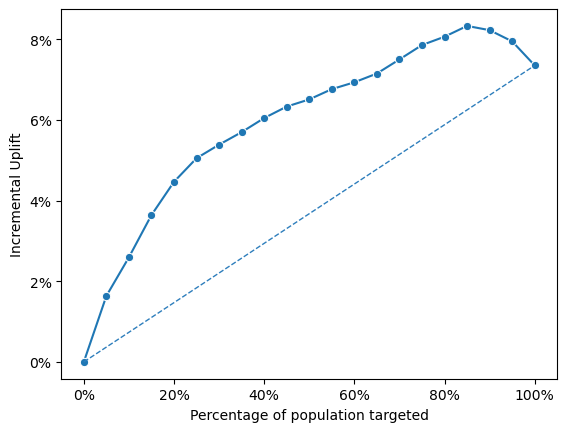

In [23]:
# plotting incremental uplift

fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score", "ad", 1, qnt = 20)

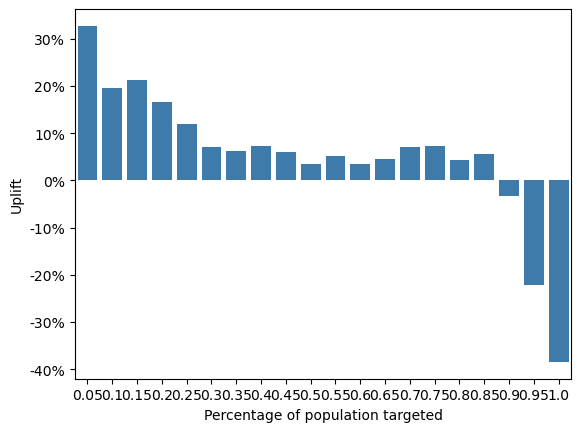

In [24]:
# plotting uplift - the diff between treatment & control percentage

fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score", "ad", 1, qnt = 20)

### INTERPRETATION:
##### Incremental Uplift plot
1. One gamer has been strongly persuaded.
2. 80% of the gamers have been positively persuaded where it peaks, after this point the graph declines showcasing losing out of potential converters. This implied we might have entered the DO NOT DISTURB section.
3. The last 3 bins (approximately 2700 gamers) show a negative uplift score, implying that the chances of them buying w/o seeing the ad was way more than the occasion of watching the ad -- customer annoyance

##### Uplift plot
1. The first 5 bins have been positively persuaded, with the first bin (~ 900 gamers) with an uplift beyond 30%. 
2. 5 out of 20 bins have strong impact of persuasion ( > 10% uplift). Majority of the gamers have moderate persuation rate, the last three being negatively persuaded. We lost a potential 2700/18000 = 15% of the gamers due to ad (Do Not Disturb)

### Question 4

In [25]:
tab

# considering the 1-5 bins (a quarter), incremental response is 454.842027
# Given financial parameters
revenue_per_conversion = 14.99
ad_cost_per_user = 1.5

T_n = 2250
inc_resp = 454.842027
profit = revenue_per_conversion*inc_resp - ad_cost_per_user*T_n
profit

# scaling this for 30k gamers out of 120k gamers
profit = profit*(30000/2250)
profit

45907.7597964

### Question 5

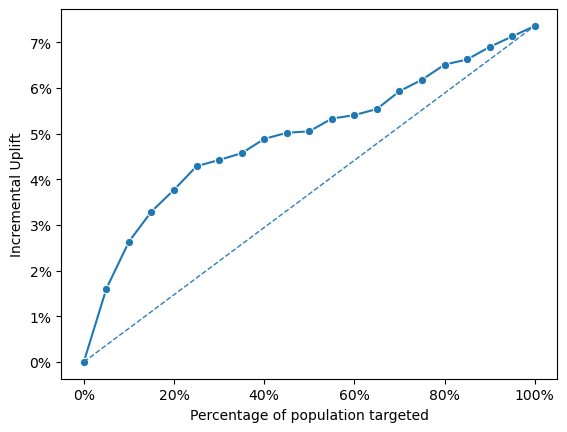

In [26]:
# calculating the uplift for a propensity model

fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment", "ad", 1, qnt = 20)

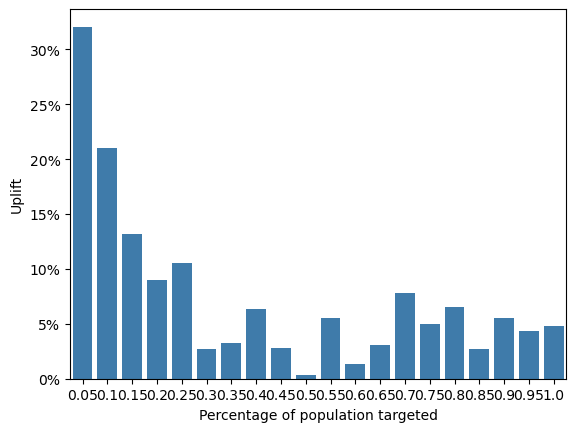

In [27]:
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment", "ad", 1, qnt = 20)

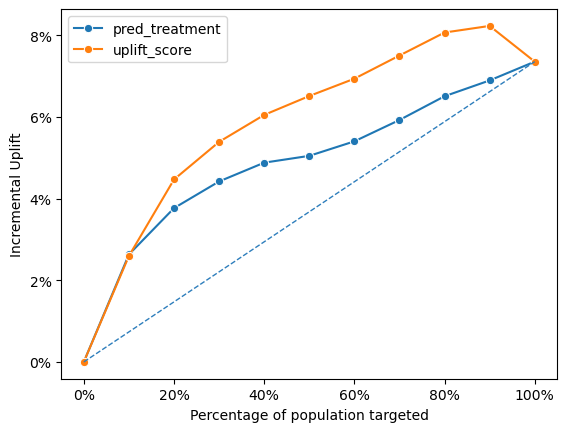

In [28]:
# comparing both incremental uplift and propesity plots together

fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment", "uplift_score"],
    "ad",
    1,
)

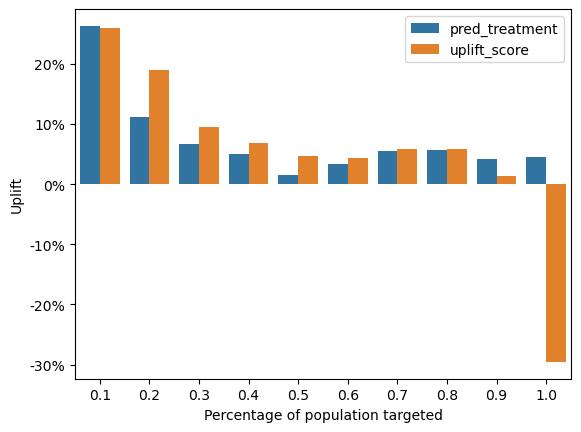

In [29]:
#comparing both uplift and propesity plots together
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment", "uplift_score"],
    "ad",
    1,
)

### INTERPRETATION

1. At the first 10%, both the models performance are almost same.
2. Propensity model peaks at a little less than 40%, and after that the rend is only decreasing implying less gamers purchasing. 
3. Uplift model consistently performs well till 80%, post which it loses potential buyers due to targeting the 'Do Not Disturb' section.
4. The uplift curve is consistently higher than the propensity-based model, meaning that targeting based on uplift scores leads to a greater net gain.
5. Targeting based on uplift scores will generate higher incremental revenue with fewer wasted ads. Propensity-based targeting can lead to over-targeting, spending resources on individuals who would convert regardless of the ad.


### Question 6

In [30]:
tab_ppb = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment", "ad", 1, qnt = 20)
tab_ppb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment,1,0.05,204,450,80,603,144.298507,1.603317,0.320663
1,pred_treatment,2,0.10,326,900,112,1131,236.875332,2.631948,0.210505
2,pred_treatment,3,0.15,430,1350,159,1605,296.261682,3.291796,0.131955
3,pred_treatment,4,0.20,525,1800,206,1994,339.042126,3.767135,0.090288
4,pred_treatment,5,0.25,615,2250,239,2344,385.584471,4.284272,0.105714
5,pred_treatment,6,0.30,672,2700,285,2807,397.863912,4.420710,0.027315
6,pred_treatment,7,0.35,726,3150,316,3162,411.199241,4.568880,0.032676
7,pred_treatment,8,0.40,775,3600,336,3603,439.279767,4.880886,0.063537
8,pred_treatment,9,0.45,813,4050,361,4044,451.464392,5.016271,0.027755
9,pred_treatment,10,0.50,838,4500,386,4527,454.302187,5.047802,0.003796


In [31]:
tab_ppb

# considering the 1-5 bins (a quarter), incremental response is 385.584471	
# Given financial parameters
revenue_per_conversion = 14.99
ad_cost_per_user = 1.5

T_n = 2250
inc_resp = 385.584471	
profit_ppb = revenue_per_conversion*inc_resp - ad_cost_per_user*T_n
profit_ppb

# scaling this for 30k gamers out of 120k gamers
profit_ppb = profit_ppb*(30000/2250)
profit_ppb

32065.48293720001

In [32]:
# using an uplift model will earn us more profit than propensity model: net profit

net_profit = profit - profit_ppb
print(profit, profit_ppb, net_profit)

45907.7597964 32065.48293720001 13842.276859199992


### Question 7 - Neural Network Model

Part 2

STEP 1: Create the columns to Scale

In [33]:
evar_scaled = rsm.scale_df(cg_rct_stacked[evar], sf=1)

evar_scaled

,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
0,0.263609,0.794088,-0.406208,0.461294,-0.333098,1.496364,-0.519166,yes,no,0.310065,-0.073774,-0.167941,0.413727,no,yes,-0.854986,-0.794420,no,no
1,1.350260,-1.311445,0.187982,-0.131161,-0.333098,-0.345375,4.414670,no,no,0.475881,1.499560,-0.167941,-0.209943,yes,no,-0.297682,-1.482984,yes,no
2,-1.547475,-1.592183,-0.406208,-0.686587,-0.333098,-0.871586,-0.519166,no,no,-0.353197,-0.073774,-0.167941,0.101892,no,no,-0.158356,0.856928,yes,yes
3,-1.547475,-0.188494,-0.109113,0.470551,-0.333098,1.262492,1.715996,no,no,-0.353197,-0.073774,-0.167941,-0.209943,yes,no,-0.437008,-2.584385,no,no
4,0.625826,0.372981,-0.406208,-0.686587,-0.333098,-0.696182,0.006148,yes,no,-0.353197,-0.073774,0.047294,-0.054025,yes,no,1.652882,-0.933037,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.460824,-1.592183,-0.406208,-0.686587,-0.333098,-0.871586,-0.519166,no,no,-0.353197,-0.073774,-0.167941,-0.209943,yes,yes,0.259622,-0.383090,no,no
59996,0.988043,-0.048125,-0.406208,0.035467,-0.333098,0.853217,-0.508866,yes,no,0.973327,-0.073774,-0.167941,0.569645,yes,no,-0.994312,-0.979745,yes,no
59997,0.988043,0.934456,-0.109113,1.822088,-0.333098,1.204024,0.459361,yes,no,0.807512,-0.073774,-0.167941,0.257810,no,no,-0.994312,0.305475,yes,yes
59998,1.350260,1.495932,-0.406208,0.016953,2.742680,-0.286907,0.582964,no,no,2.797297,-0.073774,-0.060323,-0.209943,no,no,-0.019030,0.856928,yes,no


In [34]:
# building Neural Network regression model for treatment group - W AD

nnr_treatment = rsm.model.mlp(
   data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=evar_scaled,
    hidden_layer_sizes = (1,),
    random_state = 1234
)

nnr_treatment.summary()

Multi-layer Perceptron (NN)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (60000, 19)
Nr. of weights       : 20
Nr. of observations  : 21,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.712

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFr

In [35]:
#hyperparameter for tuning

hls = [(1,), (2,), (2, 1), (2, 2), (3,), (3, 1), (3, 2), (2,3), (3, 3), (2, 5)]

param_grid = {
    #"learning_rate_init": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
    "hidden_layer_sizes": hls,
    "alpha": [0.0001, 0.001, 0.01, 0.1] # Regularization
}
hls

print(param_grid)

{'hidden_layer_sizes': [(1,), (2,), (2, 1), (2, 2), (3,), (3, 1), (3, 2), (2, 3), (3, 3), (2, 5)], 'alpha': [0.0001, 0.001, 0.01, 0.1]}


In [36]:
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

if os.path.exists('cv-objects/cross-validation-object_nnr_treatment.pkl'):
    cv=rsm.load_state('cv-objects/cross-validation-object_nnr_treatment.pkl')["cv"]
else:
    stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    cv=GridSearchCV(nnr_treatment.fitted, param_grid, scoring = {"AUC": "roc_auc"}, cv=stratified_k_fold, n_jobs=5,refit="AUC", verbose=5).fit(nnr_treatment.data_onehot, nnr_treatment.data.converted)
    if not os.path.exists('cv-objects'):
        os.mkdir('cv-objects')
    rsm.save_state({"cv": cv},'cv-objects/cross-validation-object_nnr_treatment.pkl')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [37]:
cv.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (3, 2)}

In [41]:
# building neural network regression model for treatment group - W AD

nnr_treatment_tuned = rsm.model.mlp(
   data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=evar_scaled,
    random_state = 1234,
    **cv.best_params_,
)

nnr_treatment_tuned.summary()

Multi-layer Perceptron (NN)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (60000, 19)
Nr. of weights       : 65
Nr. of observations  : 21,000
Hidden_layer_sizes   : (3, 2)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.1
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.786

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFri

In [42]:
# building neural network regression model for control group - W/O AD

nnr_control = rsm.model.mlp(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=evar_scaled,
    hidden_layer_sizes = (1,),
    random_state = 1234
)

nnr_control.summary()

Multi-layer Perceptron (NN)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (60000, 19)
Nr. of weights       : 20
Nr. of observations  : 21,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.841

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFr

In [43]:
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

if os.path.exists('cv-objects/cross-validation-object_nnr_control.pkl'):
    cv=rsm.load_state('cv-objects/cross-validation-object_nnr_control.pkl')["cv"]
else:
    stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    cv=GridSearchCV(nnr_control.fitted, param_grid, scoring = {"AUC": "roc_auc"}, cv=stratified_k_fold, n_jobs=5,refit="AUC", verbose=5).fit(nnr_control.data_onehot, nnr_control.data.converted)
    if not os.path.exists('cv-objects'):
        os.mkdir('cv-objects')
    rsm.save_state({"cv": cv},'cv-objects/cross-validation-object_nnr_control.pkl')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [44]:
# building neural network regression model for control group - W/0 AD

nnr_control_tuned = rsm.model.mlp(
   data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=evar_scaled,
    random_state = 1234,
    **cv.best_params_,
)

nnr_control_tuned.summary()

Multi-layer Perceptron (NN)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (60000, 19)
Nr. of weights       : 61
Nr. of observations  : 21,000
Hidden_layer_sizes   : (3, 1)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.1
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.859

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFri

In [45]:
# creating predictions

cg_rct_stacked["pred_treatment_nnr_tuned"] = nnr_treatment_tuned.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control_nnr_tuned"] = nnr_control_tuned.predict(cg_rct_stacked)["prediction"]

# calculating uplift score

cg_rct_stacked["uplift_score_nnr_tuned"] = cg_rct_stacked.pred_treatment_nnr_tuned - cg_rct_stacked.pred_control_nnr_tuned
cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,UserConsole,UserHasOldOS,ad,training,pred_treatment,pred_control,uplift_score,pred_treatment_nnr_tuned,pred_control_nnr_tuned,uplift_score_nnr_tuned
0,no,7,18,0,124,0,81,0,yes,no,...,no,no,0,1.0,0.082031,0.018729,0.063302,0.040815,0.014039,0.026776
1,no,10,3,2,60,0,18,479,no,no,...,yes,no,0,1.0,0.186298,0.035720,0.150578,0.074081,0.014963,0.059118
2,no,2,1,0,0,0,0,0,no,no,...,yes,yes,0,1.0,0.047125,0.012379,0.034746,0.029293,0.006487,0.022806
3,no,2,11,1,125,0,73,217,no,no,...,no,no,0,0.0,0.092398,0.010224,0.082174,0.051472,0.018228,0.033244
4,no,8,15,0,0,0,6,51,yes,no,...,yes,no,0,1.0,0.307346,0.088581,0.218765,0.343713,0.048540,0.295173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,no,no,1,0.0,0.115326,0.024719,0.090608,0.060659,0.015472,0.045186
59996,no,9,12,0,78,0,59,1,yes,no,...,yes,no,1,1.0,0.061149,0.012370,0.048779,0.033367,0.004942,0.028425
59997,no,9,19,1,271,0,71,95,yes,no,...,yes,yes,1,1.0,0.062747,0.021071,0.041676,0.063269,0.011047,0.052222
59998,no,10,23,0,76,6,20,107,no,no,...,yes,no,1,0.0,0.140842,0.106917,0.033925,0.201510,0.140118,0.061392


Part 3

In [46]:
# first, sorting the data based on the uplift score in descending order and selecting only a few columns for easy visualization -- ONLY ON TEST DATA

(
    cg_rct_stacked[["converted", "ad", "training", "pred_treatment_nnr_tuned", "pred_control_nnr_tuned", "uplift_score_nnr_tuned"]]
    .query("training == 0")
    .sort_values("uplift_score_nnr_tuned", ascending=False)
)

,converted,ad,training,pred_treatment_nnr_tuned,pred_control_nnr_tuned,uplift_score_nnr_tuned
16867,no,0,0.0,8.199294e-01,0.029505,0.790424
11129,no,0,0.0,7.819402e-01,0.077334,0.704606
25650,no,0,0.0,7.861898e-01,0.085820,0.700370
48115,yes,1,0.0,7.790414e-01,0.090841,0.688201
13930,no,0,0.0,7.593929e-01,0.077345,0.682048
...,...,...,...,...,...,...
6905,yes,0,0.0,9.256724e-02,0.593598,-0.501031
59608,yes,1,0.0,9.330950e-02,0.594483,-0.501174
50355,no,1,0.0,8.812760e-02,0.596489,-0.508362
53516,no,1,0.0,1.373923e-06,0.594999,-0.594998


In [47]:
tab_nnr = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_nnr_tuned", "ad", 1, qnt = 20)
tab_nnr

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_nnr_tuned,1,0.05,212,450,72,610,158.885246,1.765392,0.353078
1,uplift_score_nnr_tuned,2,0.10,367,900,109,1140,280.947368,3.121637,0.274633
2,uplift_score_nnr_tuned,3,0.15,491,1350,150,1653,368.495463,4.094394,0.195634
3,uplift_score_nnr_tuned,4,0.20,589,1800,177,2188,443.387569,4.926529,0.167310
4,uplift_score_nnr_tuned,5,0.25,670,2250,205,2655,496.271186,5.514124,0.120043
5,uplift_score_nnr_tuned,6,0.30,744,2700,225,3122,549.413197,6.104591,0.121618
6,uplift_score_nnr_tuned,7,0.35,803,3150,254,3609,581.304239,6.458936,0.071563
7,uplift_score_nnr_tuned,8,0.40,867,3600,272,4130,629.905569,6.998951,0.107673
8,uplift_score_nnr_tuned,9,0.45,912,4050,286,4650,662.903226,7.365591,0.073077
9,uplift_score_nnr_tuned,10,0.50,933,4500,299,5160,672.244186,7.469380,0.021176


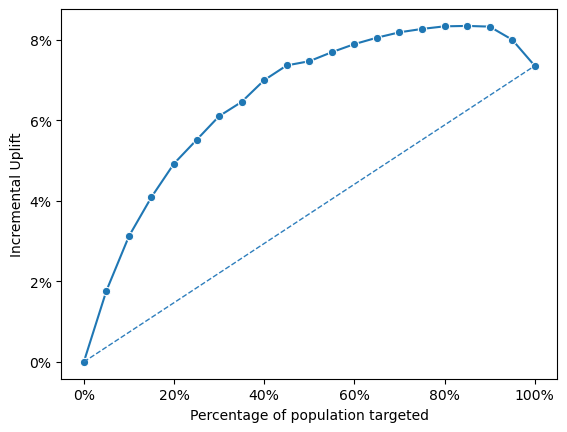

In [48]:
# plotting incremental uplift

fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_nnr_tuned", "ad", 1, qnt = 20)

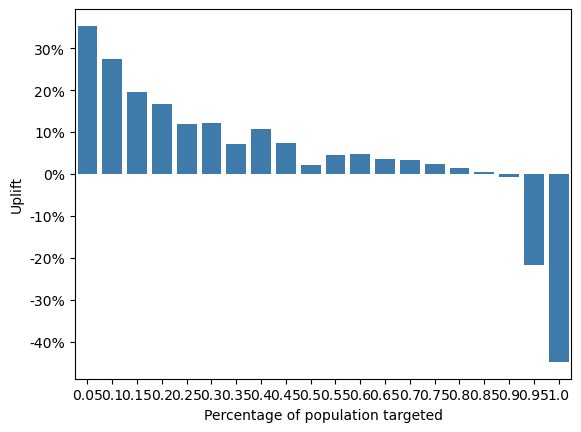

In [49]:
# plotting uplift - the diff between treatment & control percentage

fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_nnr_tuned", "ad", 1, qnt = 20)

Interpretations of the Incremental Uplift Plot:
-  Around the 70-80% range, the incremental uplift reaches its highest point.
- Therefore, 80% of the customers have been positively influenced, where the uplift peaks.
- The last few bins (approximately the lowest-scoring customers) show a declining trend, implying that these customers were more likely to convert without seeing the ad—signaling potential customer annoyance or negative impact from the campaign.


Interpretations of the Uplift plot
- The first 5 bins have been positively persuaded, with the first bin with an uplift beyond 30%.
- 6 out of 20 bins have strong impact of persuasion ( > 10% uplift). Majority of the gamers have moderate persuation rate
- The last three bins are shown to be negatively persuaded. We lost a potential 2700/18000 = 15% of the gamers due to ad (Do Not Disturb)

Part 4

In [50]:
tab_nnr

# considering the 1-5 bins (a quarter), incremental response is 496.271186440678
# Given financial parameters
revenue_per_conversion = 14.99
ad_cost_per_user = 1.5

T_n = 2250
inc_resp = 496.271186440678
profit = revenue_per_conversion*inc_resp - ad_cost_per_user*T_n
profit

# scaling this for 30k gamers out of 120k gamers
profit = profit*(30000/2250)
profit

54188.06779661017

Part 5

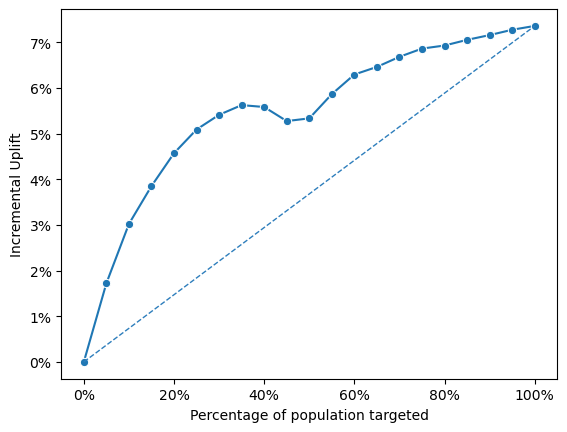

In [51]:
# calculating the uplift for a propensity model

fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_nnr_tuned", "ad", 1, qnt = 20)

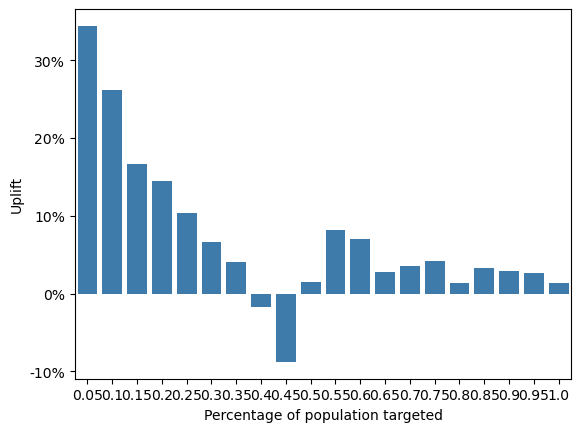

In [52]:
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_nnr_tuned", "ad", 1, qnt = 20)

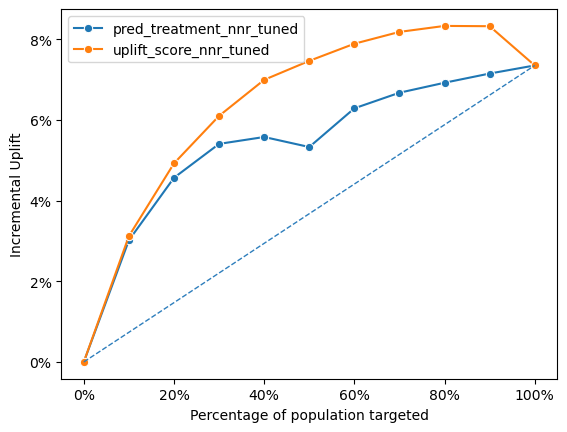

In [53]:
# comparing both incremental uplift and propesity plots together

fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_nnr_tuned", "uplift_score_nnr_tuned"],
    "ad",
    1,
)

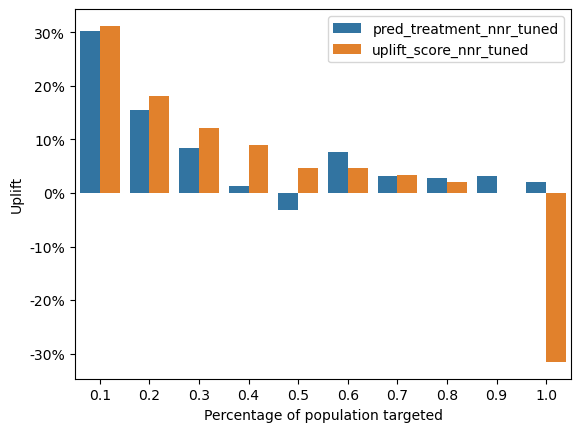

In [54]:
#comparing both uplift and propesity plots together
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_nnr_tuned", "uplift_score_nnr_tuned"],
    "ad",
    1,
)

Interpretations:
- At the first 10%, both the models' performance are similar and better than the remaining of the population targeted
- Uplift model consistently performs well till 80%, post which it loses potential buyers due to targeting the 'Do Not Disturb' section
- The uplift curve at the first 10% was lower than propensity-based model, then it started to get consistently higher than the propensity-based model, meaning that targeting based on uplift scores leads to a greater net gain
- Using uplift scores for targeting can maximize incremental revenue while reducing wasted ad spend. In contrast, propensity-based targeting risks over-targeting, allocating resources to individuals who would have converted even without the ad.

Part 6

In [55]:
tab_ppb_nnr = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_nnr_tuned", "ad", 1, qnt = 20)
tab_ppb_nnr

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_nnr_tuned,1,0.05,213,450,74,573,154.884817,1.720942,0.344188
1,pred_treatment_nnr_tuned,2,0.10,375,900,125,1090,271.788991,3.019878,0.261354
2,pred_treatment_nnr_tuned,3,0.15,491,1350,172,1606,346.417186,3.849080,0.166693
3,pred_treatment_nnr_tuned,4,0.20,601,1800,221,2096,411.209924,4.568999,0.144444
4,pred_treatment_nnr_tuned,5,0.25,695,2250,268,2543,457.878490,5.087539,0.103743
5,pred_treatment_nnr_tuned,6,0.30,764,2700,307,2991,486.868606,5.409651,0.066280
6,pred_treatment_nnr_tuned,7,0.35,831,3150,344,3334,505.985003,5.622056,0.041017
7,pred_treatment_nnr_tuned,8,0.40,883,3600,387,3659,502.240230,5.580447,-0.016752
8,pred_treatment_nnr_tuned,9,0.45,930,4050,446,3966,474.553707,5.272819,-0.087738
9,pred_treatment_nnr_tuned,10,0.50,978,4500,480,4336,479.845018,5.331611,0.014775


In [56]:
tab_ppb_nnr

# considering the 1-5 bins (a quarter), incremental response is 457.87848997247346	
# Given financial parameters
revenue_per_conversion = 14.99
ad_cost_per_user = 1.5

T_n = 2250
inc_resp = 457.87848997247346
profit_ppb = revenue_per_conversion*inc_resp - ad_cost_per_user*T_n
print(profit_ppb)

# scaling this for 30k gamers out of 120k gamers
profit_ppb = profit_ppb*(30000/2250)
print(profit_ppb)

# using an uplift model will earn us more profit than propensity model: net profit

net_profit = profit - profit_ppb
print(profit, profit_ppb, net_profit)

3488.598564687377
46514.64752916503
54188.06779661017 46514.64752916503 7673.420267445144


### Question 8 - Random Forest Model

Part 2

In [57]:
# using random forest model

evar = ['GameLevel', 'NumGameDays', 'NumGameDays4Plus', 'NumInGameMessagesSent', 'NumSpaceHeroBadges', 
'NumFriendRequestIgnored', 'NumFriends', 'AcquiredSpaceship', 'AcquiredIonWeapon', 
'TimesLostSpaceship', 'TimesKilled', 'TimesCaptain', 'TimesNavigator', 
'PurchasedCoinPackSmall', 'PurchasedCoinPackLarge', 'NumAdsClicked', 'DaysUser', 
'UserConsole', 'UserHasOldOS']

# building Random Forest model for treatment group - W AD

rfc_treatment = rsm.model.rforest(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar= evar,
    n_estimators=500,
    max_features=int(len(evar) ** 0.5),
    random_state=1234,
)
rfc_treatment.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
max_features         : 4 (4)
n_estimators         : 500
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.774

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_yes  AcquiredIonWeapon_y

In [58]:
#hyperparameter for tuning

param_grid = {
    "n_estimators": list(range(100, 501, 100)),
    "max_features": range(2, 6),
}

print(param_grid)


{'n_estimators': [100, 200, 300, 400, 500], 'max_features': range(2, 6)}


In [59]:
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

if os.path.exists('cv-objects/cross-validation-object_rfc_treatment.pkl'):
    cv=rsm.load_state('cv-objects/cross-validation-object_rfc_treatment.pkl')["cv"]
else:
    stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    cv=GridSearchCV(rfc_treatment.fitted, param_grid, scoring = {"AUC": "roc_auc"}, cv=stratified_k_fold, n_jobs=5,refit="AUC", verbose=5).fit(rfc_treatment.data_onehot, rfc_treatment.data.converted)
    if not os.path.exists('cv-objects'):
        os.mkdir('cv-objects')
    rsm.save_state({"cv": cv},'cv-objects/cross-validation-object_rfc_treatment.pkl')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [60]:
cv.best_params_

{'max_features': 2, 'n_estimators': 500}

In [61]:
# building Random Forest model for treatment group - W/O AD

rfc_treatment_tuned = rsm.model.rforest(
    data={"cg_rct_stacked_rfc_treatment": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=evar,
    random_state=1234,
    **cv.best_params_,
)
rfc_treatment_tuned.summary()

Random Forest
Data                 : cg_rct_stacked_rfc_treatment
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
max_features         : 2 (2)
n_estimators         : 500
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.775

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_yes  Acqui

In [62]:
# building Random Forest regression model for treatment group - W AD

rfc_control = rsm.model.rforest(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar= evar,
    n_estimators=500,
    max_features=int(len(evar) ** 0.5),
    random_state=1234,
)
rfc_control.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
max_features         : 4 (4)
n_estimators         : 500
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.869

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_yes  AcquiredIonWeapon_y

In [63]:
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

if os.path.exists('cv-objects/cross-validation-object_rfc_control.pkl'):
    cv=rsm.load_state('cv-objects/cross-validation-object_rfc_control.pkl')["cv"]
else:
    stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    cv=GridSearchCV(rfc_control.fitted, param_grid, scoring = {"AUC": "roc_auc"}, cv=stratified_k_fold, n_jobs=5,refit="AUC", verbose=5).fit(rfc_control.data_onehot, rfc_control.data.converted)
    if not os.path.exists('cv-objects'):
        os.mkdir('cv-objects')
    rsm.save_state({"cv": cv},'cv-objects/cross-validation-object_rfc_control.pkl')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [64]:
# building Random Forest model for treatment group - W/O AD

rfc_control_tuned = rsm.model.rforest(
    data={"cg_rct_stacked_rfc_control": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=evar,
    random_state=1234,
    **cv.best_params_,
)
rfc_control_tuned.summary()

Random Forest
Data                 : cg_rct_stacked_rfc_control
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
max_features         : 5 (5)
n_estimators         : 400
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.866

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_yes  Acquire

In [65]:
# creating predictions

cg_rct_stacked["pred_treatment_rfc_tuned"] = rfc_treatment_tuned.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control_rfc_tuned"] = rfc_control_tuned.predict(cg_rct_stacked)["prediction"]

# calculating uplift score

cg_rct_stacked["uplift_score_rfc_tuned"] = cg_rct_stacked.pred_treatment_rfc_tuned - cg_rct_stacked.pred_control_rfc_tuned
cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,training,pred_treatment,pred_control,uplift_score,pred_treatment_nnr_tuned,pred_control_nnr_tuned,uplift_score_nnr_tuned,pred_treatment_rfc_tuned,pred_control_rfc_tuned,uplift_score_rfc_tuned
0,no,7,18,0,124,0,81,0,yes,no,...,1.0,0.082031,0.018729,0.063302,0.040815,0.014039,0.026776,0.024,0.0000,0.0240
1,no,10,3,2,60,0,18,479,no,no,...,1.0,0.186298,0.035720,0.150578,0.074081,0.014963,0.059118,0.208,0.0550,0.1530
2,no,2,1,0,0,0,0,0,no,no,...,1.0,0.047125,0.012379,0.034746,0.029293,0.006487,0.022806,0.036,0.0000,0.0360
3,no,2,11,1,125,0,73,217,no,no,...,0.0,0.092398,0.010224,0.082174,0.051472,0.018228,0.033244,0.188,0.0225,0.1655
4,no,8,15,0,0,0,6,51,yes,no,...,1.0,0.307346,0.088581,0.218765,0.343713,0.048540,0.295173,0.268,0.0200,0.2480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,0.0,0.115326,0.024719,0.090608,0.060659,0.015472,0.045186,0.028,0.0000,0.0280
59996,no,9,12,0,78,0,59,1,yes,no,...,1.0,0.061149,0.012370,0.048779,0.033367,0.004942,0.028425,0.008,0.0125,-0.0045
59997,no,9,19,1,271,0,71,95,yes,no,...,1.0,0.062747,0.021071,0.041676,0.063269,0.011047,0.052222,0.036,0.0075,0.0285
59998,no,10,23,0,76,6,20,107,no,no,...,0.0,0.140842,0.106917,0.033925,0.201510,0.140118,0.061392,0.186,0.3175,-0.1315


Part 3

In [66]:
# first, sorting the data based on the uplift score from the Random Forest model in descending order and selecting only a few columns for easy visualization -- ONLY ON TEST DATA

(
    cg_rct_stacked[["converted", "ad", "training", "pred_treatment_rfc_tuned", "pred_control_rfc_tuned", "uplift_score_rfc_tuned"]]
    .query("training == 0")
    .sort_values("uplift_score_rfc_tuned", ascending=False)
)

,converted,ad,training,pred_treatment_rfc_tuned,pred_control_rfc_tuned,uplift_score_rfc_tuned
48555,no,1,0.0,0.620,0.0350,0.5850
11965,no,0,0.0,0.634,0.0500,0.5840
21992,no,0,0.0,0.584,0.0075,0.5765
31352,no,1,0.0,0.646,0.0825,0.5635
9186,no,0,0.0,0.636,0.0900,0.5460
...,...,...,...,...,...,...
19860,no,0,0.0,0.046,0.7300,-0.6840
42024,no,1,0.0,0.120,0.8075,-0.6875
50878,no,1,0.0,0.078,0.7800,-0.7020
30561,no,1,0.0,0.070,0.7775,-0.7075


In [67]:
tab_rfc = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rfc_tuned", "ad", 1, qnt = 20)
tab_rfc

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_rfc_tuned,1,0.05,200,448,50,578,161.245675,1.791619,0.359923
1,uplift_score_rfc_tuned,2,0.10,337,899,86,1142,269.299475,2.992216,0.239940
2,uplift_score_rfc_tuned,3,0.15,469,1349,121,1692,372.528960,4.139211,0.229697
3,uplift_score_rfc_tuned,4,0.20,565,1800,138,2199,452.039563,5.022662,0.179330
4,uplift_score_rfc_tuned,5,0.25,637,2250,169,2720,497.202206,5.524469,0.100499
5,uplift_score_rfc_tuned,6,0.30,704,2697,186,3205,547.481435,6.083127,0.114837
6,uplift_score_rfc_tuned,7,0.35,765,3149,206,3691,589.249797,6.547220,0.093803
7,uplift_score_rfc_tuned,8,0.40,799,3589,223,4213,609.029195,6.766991,0.044706
8,uplift_score_rfc_tuned,9,0.45,836,4039,229,4646,636.918855,7.076876,0.068365
9,uplift_score_rfc_tuned,10,0.50,872,4492,236,5142,665.832750,7.398142,0.065357


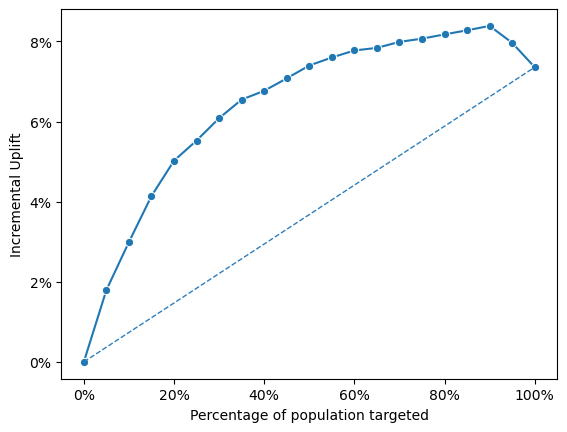

In [68]:
# plotting incremental uplift

fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rfc_tuned", "ad", 1, qnt = 20)

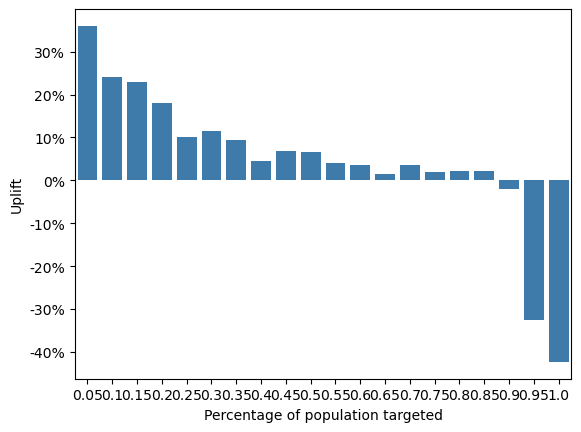

In [69]:
# plotting uplift - the diff between treatment & control percentage

fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rfc_tuned", "ad", 1, qnt = 20)

Part 4

In [70]:
tab_rfc

# considering the 1-5 bins (a quarter), incremental response is 497.2022058823529
# Given financial parameters
revenue_per_conversion = 14.99
ad_cost_per_user = 1.5

T_n = 2250
inc_resp = 497.2022058823529
profit = revenue_per_conversion*inc_resp - ad_cost_per_user*T_n
profit

# scaling this for 30k gamers out of 120k gamers
profit = profit*(30000/2250)
profit

54374.14754901961

Part 5

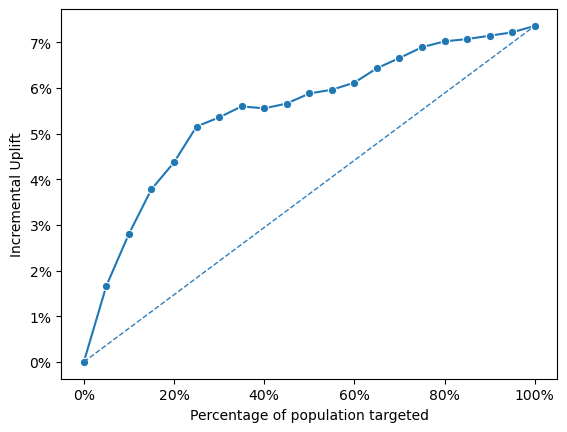

In [71]:
# calculating the uplift for a propensity model

fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_rfc_tuned", "ad", 1, qnt = 20)

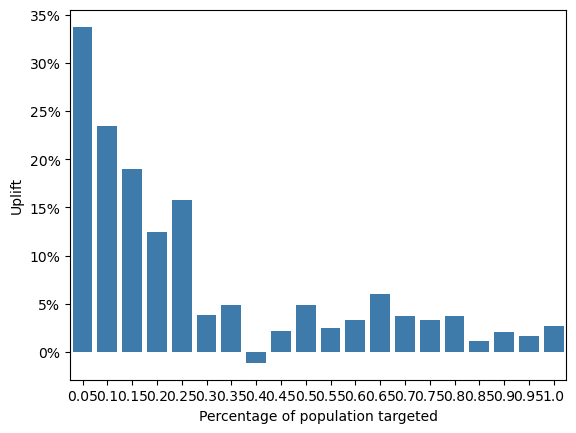

In [72]:
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_rfc_tuned", "ad", 1, qnt = 20)

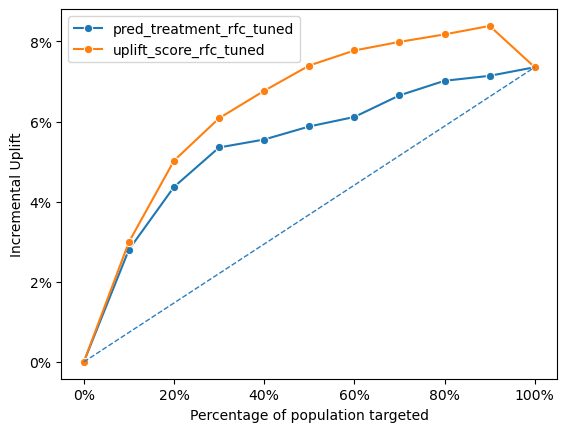

In [73]:
# comparing both incremental uplift and propesity plots together

fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_rfc_tuned", "uplift_score_rfc_tuned"],
    "ad",
    1,
)

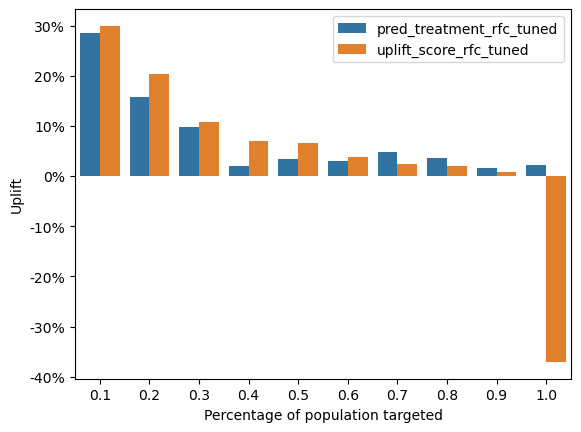

In [74]:
#comparing both uplift and propesity plots together
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_rfc_tuned", "uplift_score_rfc_tuned"],
    "ad",
    1,
)

Interpretations:
- Both models show similar performance initially with a sharp increase, this suggests that for the top 15% of the most promising customers, both models effectively identify high-value targets.
- The gap between the uplift and the propensity to buy model increases from 25% onwards
- In the final 10% (rightmost bar), the uplift model experiences a sharp negative uplift, which could indicate Do Not Disturb individuals who react negatively to the ads when they are approached
- In general, the uplift model places customers with high incrementality in most of the deciles unto 60% of the population.

Part 6


In [75]:
tab_ppb_rfc = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_rfc_tuned", "ad", 1, qnt = 20)
tab_ppb_rfc

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_rfc_tuned,1,0.05,204,445,72,594,150.060606,1.667340,0.337215
1,pred_treatment_rfc_tuned,2,0.10,354,883,125,1085,252.271889,2.803021,0.234523
2,pred_treatment_rfc_tuned,3,0.15,492,1350,178,1584,340.295455,3.781061,0.189291
3,pred_treatment_rfc_tuned,4,0.20,583,1789,214,2016,393.096230,4.367736,0.123956
4,pred_treatment_rfc_tuned,5,0.25,698,2243,253,2423,463.794882,5.153276,0.157481
5,pred_treatment_rfc_tuned,6,0.30,772,2684,308,2848,481.735955,5.352622,0.038389
6,pred_treatment_rfc_tuned,7,0.35,836,3137,350,3302,503.489400,5.594327,0.048769
7,pred_treatment_rfc_tuned,8,0.40,883,3557,397,3683,499.581863,5.550910,-0.011455
8,pred_treatment_rfc_tuned,9,0.45,938,4021,439,4115,509.028190,5.655869,0.021312
9,pred_treatment_rfc_tuned,10,0.50,985,4472,462,4530,528.915232,5.876836,0.048791


In [76]:
tab_ppb_rfc

# considering the 1-5 bins (a quarter), incremental response is 463.7948823772183
# Given financial parameters
revenue_per_conversion = 14.99
ad_cost_per_user = 1.5

T_n = 2243
inc_resp = 463.7948823772183	
profit_ppb = revenue_per_conversion*inc_resp - ad_cost_per_user*T_n
profit_ppb

# scaling this for 30k gamers out of 120k gamers
profit_ppb = profit_ppb*(30000/2243)
profit_ppb

# using an uplift model will earn us more profit than propensity model: net profit

net_profit = profit - profit_ppb
print(profit, profit_ppb, net_profit)

54374.14754901961 47986.42826796036 6387.719281059253


### Question 9 - XGBoost Model

Part 2

In [77]:
# buildingXGBoost model for treatment group - W AD
evar = evar[evar.index("GameLevel") : evar.index("UserHasOldOS") + 1]

xgb_treatment = rsm.model.xgboost(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=evar,
    n_estimators=100,
    max_depth=6,
    min_child_weight=1,
    learning_rate=0.3,
    random_state=1234,
)
xgb_treatment.summary()

XGBoost
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
n_estimators         : 100
max_depth            : 6
min_child_weight     : 1
learning_rate        : 0.3
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.959

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser 

In [78]:
import numpy as np
param_grid = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(3, 6),
    'learning_rate': np.arange(0.1, 0.31, 0.03)
}

param_grid

{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 'max_depth': array([3, 4, 5]),
 'learning_rate': array([0.1 , 0.13, 0.16, 0.19, 0.22, 0.25, 0.28])}

In [79]:
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

if os.path.exists('cv-objects/cross-validation-object_xgb_control.pkl'):
    cv=rsm.load_state('cv-objects/cross-validation-object_xgb_control.pkl')["cv"]
else:
    stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    cv=GridSearchCV(xgb_treatment.fitted, param_grid, scoring = {"AUC": "roc_auc"}, cv=stratified_k_fold, n_jobs=5,refit="AUC", verbose=5).fit(xgb_treatment.data_onehot, xgb_treatment.data.converted)
    if not os.path.exists('cv-objects'):
        os.mkdir('cv-objects')
    rsm.save_state({"cv": cv},'cv-objects/cross-validation-object_xgb_treatment.pkl')

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


In [80]:
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [81]:

# buildingXGBoost model for treatment group - W AD

xgb_treatment_tuned = rsm.model.xgboost(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=evar,
    min_child_weight=1,
    random_state=1234,
    **cv.best_params_,
    
)
xgb_treatment_tuned.summary()

XGBoost
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
n_estimators         : 100
max_depth            : 3
min_child_weight     : 1
learning_rate        : 0.1
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.807

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser 

In [82]:
# buildingXGBoost model for treatment group - W/O AD
evar = evar[evar.index("GameLevel") : evar.index("UserHasOldOS") + 1]

xgb_control = rsm.model.xgboost(
    data={"cg_rct_xgb_control": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=evar,
    n_estimators=100,
    max_depth=6,
    min_child_weight=1,
    learning_rate=0.3,
    random_state=1234,
)
xgb_control.summary()

XGBoost
Data                 : cg_rct_xgb_control
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
n_estimators         : 100
max_depth            : 6
min_child_weight     : 1
learning_rate        : 0.3
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.991

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysU

In [83]:
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

if os.path.exists('cv-objects/cross-validation-object_xgb_control.pkl'):
    cv=rsm.load_state('cv-objects/cross-validation-object_xgb_control.pkl')["cv"]
else:
    stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    cv=GridSearchCV(xgb_control.fitted, param_grid, scoring = {"AUC": "roc_auc"}, cv=stratified_k_fold, n_jobs=5,refit="AUC", verbose=5).fit(xgb_control.data_onehot, xgb_control.data.converted)
    if not os.path.exists('cv-objects'):
        os.mkdir('cv-objects')
    rsm.save_state({"cv": cv},'cv-objects/cross-validation-object_xgb_control.pkl')
    
print(cv.best_params_)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [84]:
# buildingXGBoost model for treatment group - W/O AD

xgb_control_tuned = rsm.model.xgboost(
    data={"cg_rct_stacked_control": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=evar,
    random_state=1234,
    **cv.best_params_,
)
xgb_control_tuned.summary()

XGBoost
Data                 : cg_rct_stacked_control
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
n_estimators         : 100
max_depth            : 3
min_child_weight     : 1
learning_rate        : 0.1
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.909

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  D

In [85]:
# creating predictions

cg_rct_stacked["pred_treatment_xgb_tuned"] = xgb_treatment_tuned.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control_xgb_tuned"] = xgb_control_tuned.predict(cg_rct_stacked)["prediction"]

# calculating uplift score

cg_rct_stacked["uplift_score_xgb_tuned"] = cg_rct_stacked.pred_treatment_xgb_tuned - cg_rct_stacked.pred_control_xgb_tuned
cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,uplift_score,pred_treatment_nnr_tuned,pred_control_nnr_tuned,uplift_score_nnr_tuned,pred_treatment_rfc_tuned,pred_control_rfc_tuned,uplift_score_rfc_tuned,pred_treatment_xgb_tuned,pred_control_xgb_tuned,uplift_score_xgb_tuned
0,no,7,18,0,124,0,81,0,yes,no,...,0.063302,0.040815,0.014039,0.026776,0.024,0.0000,0.0240,0.010517,0.002571,0.007947
1,no,10,3,2,60,0,18,479,no,no,...,0.150578,0.074081,0.014963,0.059118,0.208,0.0550,0.1530,0.150799,0.037848,0.112951
2,no,2,1,0,0,0,0,0,no,no,...,0.034746,0.029293,0.006487,0.022806,0.036,0.0000,0.0360,0.021918,0.005025,0.016893
3,no,2,11,1,125,0,73,217,no,no,...,0.082174,0.051472,0.018228,0.033244,0.188,0.0225,0.1655,0.133339,0.016783,0.116556
4,no,8,15,0,0,0,6,51,yes,no,...,0.218765,0.343713,0.048540,0.295173,0.268,0.0200,0.2480,0.246667,0.041300,0.205367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,0.090608,0.060659,0.015472,0.045186,0.028,0.0000,0.0280,0.027843,0.003978,0.023865
59996,no,9,12,0,78,0,59,1,yes,no,...,0.048779,0.033367,0.004942,0.028425,0.008,0.0125,-0.0045,0.046499,0.011745,0.034754
59997,no,9,19,1,271,0,71,95,yes,no,...,0.041676,0.063269,0.011047,0.052222,0.036,0.0075,0.0285,0.084010,0.027529,0.056481
59998,no,10,23,0,76,6,20,107,no,no,...,0.033925,0.201510,0.140118,0.061392,0.186,0.3175,-0.1315,0.164460,0.223584,-0.059125


Part 3

In [86]:
# first, sorting the data based on the uplift score from the XGBoost model in descending order and selecting only a few columns for easy visualization -- ONLY ON TEST DATA
(
    cg_rct_stacked[["converted", "ad", "training", "pred_treatment_xgb_tuned", "pred_control_xgb_tuned", "uplift_score_xgb_tuned"]]
    .query("training == 0")
    .sort_values("uplift_score_xgb_tuned", ascending=False)
)

,converted,ad,training,pred_treatment_xgb_tuned,pred_control_xgb_tuned,uplift_score_xgb_tuned
55710,no,1,0.0,0.880777,0.050125,0.830651
554,no,0,0.0,0.758897,0.065422,0.693476
37052,yes,1,0.0,0.809322,0.116048,0.693274
32768,no,1,0.0,0.789637,0.107410,0.682227
8879,no,0,0.0,0.809420,0.130014,0.679406
...,...,...,...,...,...,...
53415,no,1,0.0,0.090089,0.821037,-0.730949
53293,no,1,0.0,0.097811,0.830530,-0.732719
33374,no,1,0.0,0.083844,0.845555,-0.761711
44411,no,1,0.0,0.085253,0.855152,-0.769899


In [87]:
tab_xgb = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb_tuned", "ad", 1, qnt = 20)
tab_xgb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_xgb_tuned,1,0.05,203,450,75,632,149.598101,1.662201,0.332440
1,uplift_score_xgb_tuned,2,0.10,332,900,105,1150,249.826087,2.775845,0.228752
2,uplift_score_xgb_tuned,3,0.15,455,1350,127,1684,353.188836,3.924320,0.232135
3,uplift_score_xgb_tuned,4,0.20,573,1800,163,2197,439.454256,4.882825,0.192047
4,uplift_score_xgb_tuned,5,0.25,654,2250,185,2661,497.573844,5.528598,0.132586
5,uplift_score_xgb_tuned,6,0.30,720,2700,205,3206,547.354959,6.081722,0.109969
6,uplift_score_xgb_tuned,7,0.35,777,3150,218,3732,592.996785,6.588853,0.101952
7,uplift_score_xgb_tuned,8,0.40,840,3600,236,4239,639.575372,7.106393,0.104497
8,uplift_score_xgb_tuned,9,0.45,876,4050,248,4771,665.478097,7.394201,0.057444
9,uplift_score_xgb_tuned,10,0.50,923,4500,260,5263,700.693331,7.785481,0.080054


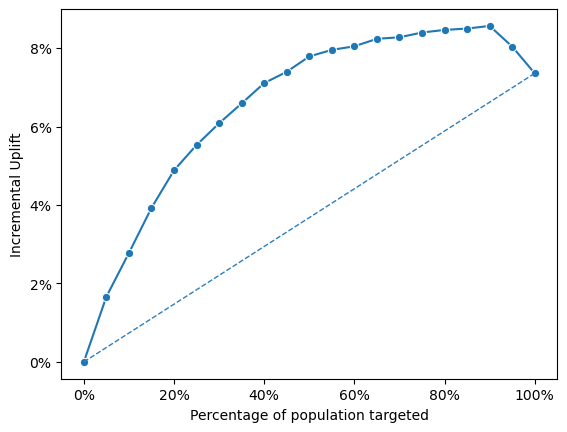

In [88]:
# plotting incremental uplift

fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb_tuned", "ad", 1, qnt = 20)

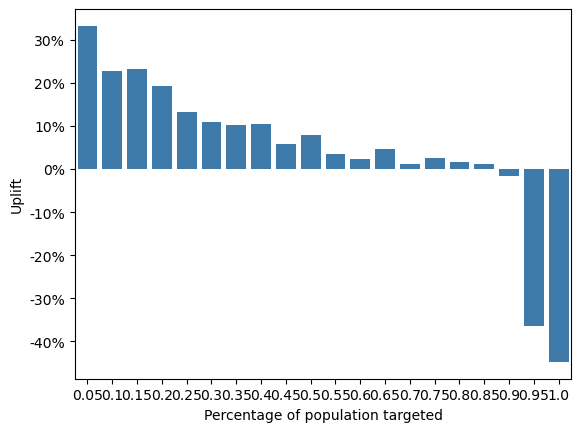

In [89]:
# plotting uplift - the diff between treatment & control percentage

fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb_tuned", "ad", 1, qnt = 20)

Part 4

In [90]:
tab_xgb

# considering the 1-5 bins (a quarter), incremental response is 497.5738444193912
# Given financial parameters
revenue_per_conversion = 14.99
ad_cost_per_user = 1.5

T_n = 2250
inc_resp = 497.5738444193912
profit = revenue_per_conversion*inc_resp - ad_cost_per_user*T_n
profit

# scaling this for 30k gamers out of 120k gamers
profit = profit*(30000/2250)
profit

54448.42570462233

Part 5

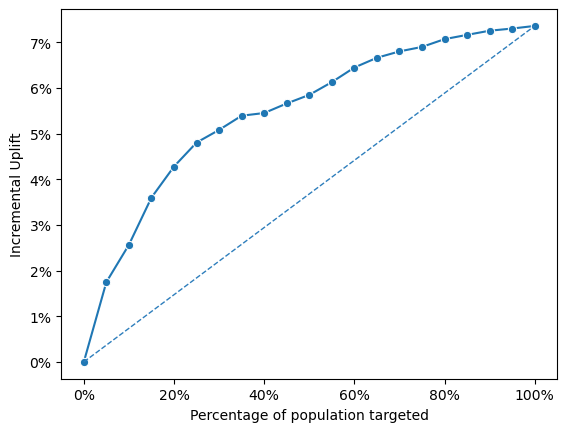

In [91]:
# calculating the uplift for a propensity model

fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_xgb_tuned", "ad", 1, qnt = 20)

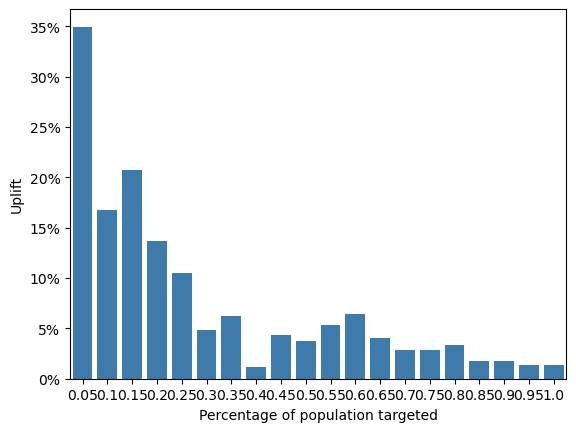

In [92]:
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_xgb_tuned", "ad", 1, qnt = 20)

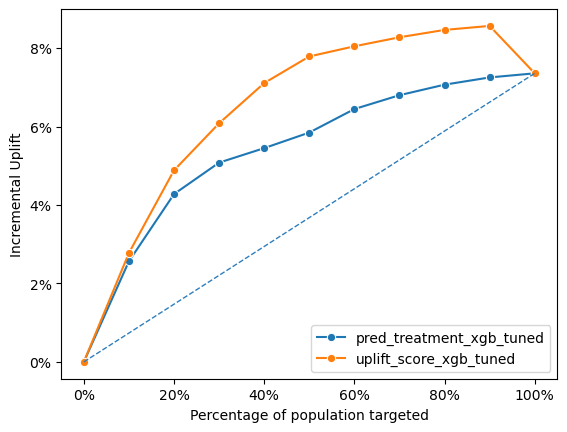

In [93]:
# comparing both incremental uplift and propesity plots together

fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_xgb_tuned", "uplift_score_xgb_tuned"],
    "ad",
    1,
)

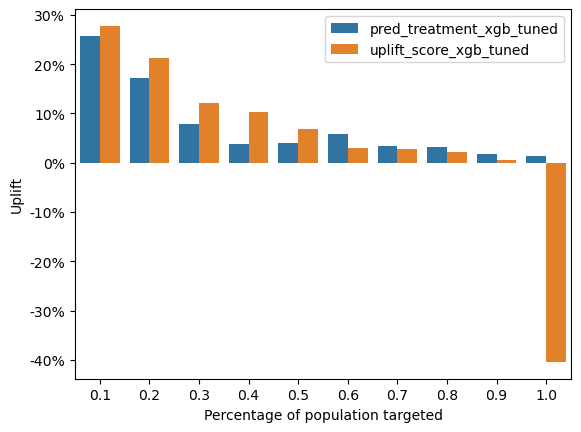

In [94]:

#comparing both uplift and propesity plots together
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_xgb_tuned", "uplift_score_xgb_tuned"],
    "ad",
    1,
)

Interpretations:
- The uplift model prioritizes customers with high incrementality, effectively targeting up to 85% of the population.
- Incrementality is lower for the propensity model since it targets both those already likely to convert and those who need encouragement, whereas the uplift model focuses solely on the latter.
- Both models perform similarly in the first 10%, but from 10% to 45%, the propensity model lags behind as it likely includes customers who would purchase regardless of the ad in its targeting.
- In the last 15%, the propensity model shows higher uplift than the uplift model, likely due to targeting customers resistant to ads, who react negatively when approached.

Part 6

In [95]:
tab_ppb_xgb = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_xgb_tuned", "ad", 1, qnt = 20)
tab_ppb_xgb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_xgb_tuned,1,0.05,219,450,85,620,157.306452,1.747849,0.349570
1,pred_treatment_xgb_tuned,2,0.10,345,900,134,1056,230.795455,2.564394,0.167615
2,pred_treatment_xgb_tuned,3,0.15,474,1350,175,1573,323.809282,3.597881,0.207363
3,pred_treatment_xgb_tuned,4,0.20,575,1800,218,2065,384.975787,4.277509,0.137046
4,pred_treatment_xgb_tuned,5,0.25,670,2250,263,2488,432.158360,4.801760,0.104728
5,pred_treatment_xgb_tuned,6,0.30,754,2700,315,2865,457.141361,5.079348,0.048736
6,pred_treatment_xgb_tuned,7,0.35,831,3150,356,3242,485.102406,5.390027,0.062358
7,pred_treatment_xgb_tuned,8,0.40,885,3600,399,3640,490.384615,5.448718,0.011960
8,pred_treatment_xgb_tuned,9,0.45,936,4050,429,4071,509.212970,5.657922,0.043728
9,pred_treatment_xgb_tuned,10,0.50,980,4499,457,4530,526.127373,5.845860,0.036993


In [96]:
tab_ppb_xgb

# considering the 1-5 bins (a quarter), incremental response is 432.15836012861735
# Given financial parameters
revenue_per_conversion = 14.99
ad_cost_per_user = 1.5

T_n = 2250
inc_resp = 432.15836012861735
profit_ppb = revenue_per_conversion*inc_resp - ad_cost_per_user*T_n
print(profit_ppb)

# scaling this for 30k gamers out of 120k gamers
profit_ppb = profit_ppb*(30000/2250)
print(profit_ppb)

# using an uplift model will earn us more profit than propensity model: net profit

net_profit = profit - profit_ppb
print(profit, profit_ppb, net_profit)

3103.053818327974
41374.05091103966
54448.42570462233 41374.05091103966 13074.374793582669


## Part II: Targeting the optimal proportion of customers

### QUESTION 1 

##### STEP 1: Formula to use to select customers in a propensity model to maximize profit

In [97]:
## To find the proportion of customers with max. profit :

## Profit > Revenue - Cost
## Profit > (Revenue * p(conversion)) - Cost

## (Revenue * p(conversion)) - Cost > 0
## P(Conversion for each customer) > Cost per customer/Revenue per customer

revenue_per_conversion = 14.99
ad_cost_per_user = 1.5

P_conv = (ad_cost_per_user/revenue_per_conversion)

P_conv

0.1000667111407605

##### STEP 2: Compute the Percentage of Targeted Customers

In [98]:
# Count how many customers in the treatment group exceed this threshold
profitable_customers = cg_rct_stacked.query("training == 0 and ad == 1 and pred_treatment > @P_conv").shape[0]

# Total number of treated customers in the test set
total_treated_customers = cg_rct_stacked.query("training == 0 and ad == 1").shape[0]

# Compute percentage of customers that should be targeted
optimal_target_percentage = (profitable_customers / total_treated_customers) * 100

# Display result
optimal_target_percentage

47.98888888888889

### QUESTION 2

In [99]:
revenue_per_conversion = 14.99  # Revenue per purchase
ad_cost_per_user = 1.50  # Cost per ad impression

tab["incremental_profit"] = (tab['incremental_resp'] * revenue_per_conversion) - (ad_cost_per_user*tab['T_n'])

optimal_index = tab["incremental_profit"].idxmax()

optimal_uplift_percentage = tab.loc[tab["incremental_profit"].idxmax(),'cum_prop']

optimal_uplift_percentage = float(tab.loc[tab["incremental_profit"].idxmax(),'cum_prop'])*100
print(f"Target Percentage Uplift: {optimal_uplift_percentage}")

Target Percentage Uplift: 25.0


#### QUESTION 3

In [100]:
def round_to_nearest_5(value):
    return round(value / 5) * 5

# Round to nearest 5%
optimal_propensity_percentage = round_to_nearest_5(optimal_target_percentage)
optimal_uplift_percentage = round_to_nearest_5(optimal_uplift_percentage)

optimal_propensity_percentage, optimal_uplift_percentage

(50, 25)

In [101]:
# Given total population
total_customers = 120000

# Compute the number of targeted customers
target_customers_propensity = int((optimal_propensity_percentage / 100) * total_customers)
target_customers_uplift = int((optimal_uplift_percentage / 100) * total_customers)

# Compute scaled incremental profits
rev_per_customer = 14.99  # Revenue per conversion
ad_cost_per_customer = 1.50  # Ad cost per customer

# Using uplift table to get cumulative incremental response for selected proportion
incremental_resp_propensity = tab_ppb.loc[tab_ppb["cum_prop"]==optimal_propensity_percentage/100]["incremental_resp"].values[0]*total_customers/9000
incremental_resp_uplift = tab.loc[tab["cum_prop"]==optimal_uplift_percentage/100]["incremental_resp"].values[0]*total_customers/9000

# Compute total incremental profit
incremental_profit_propensity = (incremental_resp_propensity * rev_per_customer) - (ad_cost_per_customer * target_customers_propensity)
incremental_profit_uplift = (incremental_resp_uplift * rev_per_customer) - (ad_cost_per_customer * target_customers_uplift)

# Display results
incremental_profit_propensity, incremental_profit_uplift , target_customers_propensity, target_customers_uplift


(799.8637508283573, 45907.759761549925, 60000, 30000)

### QUESTION 4

In [102]:
# Count how many customers in the treatment group exceed this threshold
profitable_customers_nn = cg_rct_stacked.query("training == 0 and ad == 1 and pred_treatment_nnr_tuned > @P_conv").shape[0]

# Total number of treated customers in the test set
total_treated_customers_nn = cg_rct_stacked.query("training == 0 and ad == 1").shape[0]

# Compute percentage of customers that should be targeted
optimal_target_percentage_nn = (profitable_customers_nn / total_treated_customers_nn) * 100

# Display result
optimal_target_percentage_nn

46.577777777777776

In [103]:
tab_nnr["incremental_profit"] = (tab_nnr['incremental_resp'] * revenue_per_conversion) - (ad_cost_per_user*tab_nnr['T_n'])

optimal_index_nn = tab_nnr["incremental_profit"].idxmax()

optimal_uplift_percentage_nn = tab_nnr.loc[tab_nnr["incremental_profit"].idxmax(),'cum_prop']

optimal_uplift_percentage_nn = float(tab_nnr.loc[tab_nnr["incremental_profit"].idxmax(),'cum_prop'])*100
print(f"Target Percentage Uplift: {optimal_uplift_percentage_nn}")

Target Percentage Uplift: 30.0


In [104]:
optimial_propensity_percentage_nn = round_to_nearest_5(optimal_target_percentage_nn)
optimal_uplift_percentage_nn = round_to_nearest_5(optimal_uplift_percentage_nn)

optimial_propensity_percentage_nn, optimal_uplift_percentage_nn

(45, 30)

In [105]:
total_customers = 120000

target_customers_propensity_nn = int((optimial_propensity_percentage_nn / 100) * total_customers)

target_customers_uplift_nn = int((optimal_uplift_percentage_nn / 100) * total_customers)

rev_per_customer = 14.99  # Revenue per conversion
ad_cost_per_customer = 1.50  # Ad cost per customer

incremental_resp_propensity_nn = tab_ppb_nnr.loc[tab_ppb_nnr["cum_prop"]==optimial_propensity_percentage_nn/100]["incremental_resp"].values[0]*total_customers/9000
incremental_resp_uplift_nn = tab_nnr.loc[tab_nnr["cum_prop"]==optimal_uplift_percentage_nn/100]["incremental_resp"].values[0]*total_customers/9000

incremental_profit_propensity_nn = (incremental_resp_propensity_nn * rev_per_customer) - (ad_cost_per_customer * target_customers_propensity_nn)
incremental_profit_uplift_nn = (incremental_resp_uplift_nn * rev_per_customer) - (ad_cost_per_customer * target_customers_uplift_nn)

incremental_profit_propensity_nn, incremental_profit_uplift_nn , target_customers_propensity_nn, target_customers_uplift_nn

(13847.467473524972, 55809.38424087124, 54000, 36000)

### QUESTION 5

In [106]:
profitable_customers_rfc = cg_rct_stacked.query("training == 0 and ad == 1 and pred_treatment_rfc_tuned > @P_conv").shape[0]

total_treated_customers_rfc = cg_rct_stacked.query("training == 0 and ad == 1").shape[0]

optimal_target_percentage_rfc = (profitable_customers_rfc / total_treated_customers_rfc) * 100

optimal_target_percentage_rfc

51.2

In [107]:
tab_rfc["incremental_profit"] = (tab_rfc['incremental_resp'] * revenue_per_conversion) - (ad_cost_per_user*tab_rfc['T_n'])

optimal_index_rfc = tab_rfc["incremental_profit"].idxmax()

optimal_uplift_percentage_rfc = tab_rfc.loc[tab_rfc["incremental_profit"].idxmax(),'cum_prop']

optimal_uplift_percentage_rfc = float(tab_rfc.loc[tab_rfc["incremental_profit"].idxmax(),'cum_prop'])*100
print(f"Target Percentage Uplift: {optimal_uplift_percentage_rfc}")

Target Percentage Uplift: 30.0


In [108]:
optimal_propensity_percentage_rfc = round_to_nearest_5(optimal_target_percentage_rfc)
optimal_uplift_percentage_rfc = round_to_nearest_5(optimal_uplift_percentage_rfc)

optimal_propensity_percentage_rfc, optimal_uplift_percentage_rfc

(50, 30)

In [109]:
total_customers = 120000

target_customers_propensity_rfc = int((optimal_propensity_percentage_rfc / 100) * total_customers)
target_customers_uplift_rfc = int((optimal_uplift_percentage_rfc / 100) * total_customers)

rev_per_customer = 14.99  # Revenue per conversion
ad_cost_per_customer = 1.50  # Ad cost per customer

incremental_resp_propensity_rfc = tab_ppb_rfc.loc[tab_ppb_rfc["cum_prop"]==optimal_propensity_percentage_rfc/100]["incremental_resp"].values[0]*total_customers/9000
incremental_resp_uplift_rfc = tab_rfc.loc[tab_rfc["cum_prop"]==optimal_uplift_percentage_rfc/100]["incremental_resp"].values[0]*total_customers/9000

incremental_profit_propensity_rfc = (incremental_resp_propensity_rfc * rev_per_customer) - (ad_cost_per_customer * target_customers_propensity_rfc)
incremental_profit_uplift_rfc = (incremental_resp_uplift_rfc * rev_per_customer) - (ad_cost_per_customer * target_customers_uplift_rfc)

incremental_profit_propensity_rfc, incremental_profit_uplift_rfc , target_customers_propensity_rfc, target_customers_uplift_rfc

(15712.524326710816, 55423.28952678108, 60000, 36000)

### QUESTION 6

In [110]:
profitable_customers_xgb = cg_rct_stacked.query("training == 0 and ad == 1 and pred_treatment_xgb_tuned > @P_conv").shape[0]

total_treated_customers_xgb = cg_rct_stacked.query("training == 0 and ad == 1").shape[0]

optimal_target_percentage_xgb = (profitable_customers_xgb / total_treated_customers_xgb) * 100

optimal_target_percentage_xgb

51.54444444444445

In [111]:
tab_xgb["incremental_profit"] = (tab_xgb['incremental_resp'] * revenue_per_conversion) - (ad_cost_per_user*tab_xgb['T_n'])

optimal_index_xgb = tab_xgb["incremental_profit"].idxmax()

optimal_uplift_percentage_xgb = tab_xgb.loc[tab_xgb["incremental_profit"].idxmax(),'cum_prop']

optimal_uplift_percentage_xgb = float(tab_xgb.loc[tab_xgb["incremental_profit"].idxmax(),'cum_prop'])*100
print(f"Target Percentage Uplift: {optimal_uplift_percentage_xgb}")

Target Percentage Uplift: 40.0


In [112]:
optimal_propensity_percentage_xgb = round_to_nearest_5(optimal_target_percentage_xgb)

optimal_uplift_percentage_xgb = round_to_nearest_5(optimal_uplift_percentage_xgb)

optimal_propensity_percentage_xgb, optimal_uplift_percentage_xgb

(50, 40)

In [113]:
total_customers = 120000

target_customers_propensity_xgb = int((optimal_propensity_percentage_xgb / 100) * total_customers)
target_customers_uplift_xgb = int((optimal_uplift_percentage_xgb / 100) * total_customers)

rev_per_customer = 14.99  # Revenue per conversion
ad_cost_per_customer = 1.50  # Ad cost per customer

incremental_resp_propensity_xgb = tab_ppb_xgb.loc[tab_ppb_xgb["cum_prop"]==optimal_propensity_percentage_xgb/100]["incremental_resp"].values[0]*total_customers/9000
incremental_resp_uplift_xgb = tab_xgb.loc[tab_xgb["cum_prop"]==optimal_uplift_percentage_xgb/100]["incremental_resp"].values[0]*total_customers/9000

incremental_profit_propensity_xgb = (incremental_resp_propensity_xgb * rev_per_customer) - (ad_cost_per_customer * target_customers_propensity_xgb)
incremental_profit_uplift_xgb = (incremental_resp_uplift_xgb * rev_per_customer) - (ad_cost_per_customer * target_customers_uplift_xgb)

incremental_profit_propensity_xgb, incremental_profit_uplift_xgb , target_customers_propensity_xgb, target_customers_uplift_xgb

(15155.324297277417, 55829.797593772106, 60000, 48000)

### QUESTION 7

## Why Uplift Modeling Outperforms Propensity-to-Buy Modeling in Incremental Profit

### 1. Uplift Modeling Identifies True Causal Impact
- **Propensity-to-buy modeling** predicts which customers are likely to purchase, regardless of the ad.
- This can lead to **wasted marketing spend** on customers who would have converted anyway.
- **Uplift modeling**, however, estimates the actual effect of the ad by comparing treatment and control groups.
- It helps identify **persuadable customers** who only convert due to the ad, maximizing **incremental profit**.

### 2. Reduced Targeting of “Do-Not-Disturb” Customers
- **Propensity models** may mistakenly target customers who would have purchased but react negatively to ads.
- **Uplift modeling** accounts for the potential **negative impact** of an ad on certain customers.
- This ensures that resources are spent on **customers who benefit from the intervention**, improving efficiency.

### Conclusion
By focusing on **incremental conversions** rather than just high-propensity buyers, uplift modeling **optimizes ad spend** and yields **higher incremental profits**.

# Part III: Generative AI

## Interactions with ChatGPT

### Specific Examples of Prompts Used
- "How do I differentiate between propensity and uplift models in terms of application?"
- "Can you explain the logic behind the model-building steps in the uplift demo file?"
- "How should I approach scaling profit calculations when extrapolating results?"
- "What is the syntax issue below?"

## How AI Responses Helped or Hindered Understanding

### Helpful Aspects:
#### 1. Understanding Propensity vs. Uplift Models
- ChatGPT provided a clear distinction between **propensity models** (predicting conversion probability) and **uplift models** (measuring the ad's impact).
- Helped in identifying when to use each model for business decision-making.

#### 2. Syntax & Logic in the Uplift Demo File
- Reviewed the syntax and logic of feature transformations, model training, and evaluation metrics.
- Clarified the purpose of specific functions used in model implementation.

#### 3. Profit Calculation & Scaling
- Guided how to compute **incremental profit per customer segment** based on uplift scores.
- Provided insights into correctly **scaling profits when extrapolating** to a larger audience.

### Hindering Aspects:
#### 1. Code Adaptability Issues
- Some AI-generated code required modifications to align with the dataset’s structure.
- Follow-up questions were needed to adjust outputs based on specific column names and data formats.

#### 2. Scaling Confusion
- Initially, ChatGPT struggled with determining the correct scaling approach for extrapolating profits.
- Required iterative refinements before reaching the most accurate scaling method.

## Limitations
- **Tendency for Overgeneralization**: Some responses pulled in irrelevant third-party data, requiring careful verification.
- **Incorrect Prompting**: ChatGPT sometimes provided generic answers that needed refinement.
- **Losing Context**: Losing ongoing conversations forced re-explanations, reducing workflow efficiency.
- **Suboptimal Solutions**: Occasionally suggested solutions required tweaking to fit our specific needs.

## Questions That Arose During Interactions
- How does ChatGPT determine the most efficient preprocessing approach for categorical data?
- How can GenAI tools be leveraged for real-time debugging in integrated development environments?

## How AI Complemented Our Work
Using ChatGPT for the **Creative Gaming: Uplift case study** primarily helped with **syntax-related issues** and **parameter tuning for model building**, allowing us to focus more on **logical reasoning rather than coding complexities**. It also enhanced our understanding of business use cases, helping us distinguish when to apply **propensity models versus uplift models** effectively.

While ChatGPT streamlined the technical aspects, **manual validation remained crucial** to ensure accurate implementation. Moving forward, we plan to refine our approach to **prompt engineering and validation**, leveraging AI as a support tool to deepen our comprehension of both **technical execution and strategic decision-making**.